In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
data = pd.read_csv("/content/cityday.csv")
data['Date'] = pd.to_datetime(data['Date'])
data.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-02-01,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-03-01,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-04-01,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-05-01,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

In [5]:
df1 = data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['Air_quality']=df1['Air_quality'].fillna('Moderate')
df=df1.copy()

In [6]:
df.drop(['NO', 'NO2','Benzene','Toluene','Xylene'],axis=1,inplace=True)
df

,City,Date,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI,Air_quality
0,Ahmedabad,2015-01-01,48.57,95.68,17.15,15.85,0.92,27.64,133.36,118.0,Moderate
1,Ahmedabad,2015-02-01,48.57,95.68,16.46,15.85,0.97,24.55,34.06,118.0,Moderate
2,Ahmedabad,2015-03-01,48.57,95.68,29.70,15.85,17.40,29.07,30.70,118.0,Moderate
3,Ahmedabad,2015-04-01,48.57,95.68,17.97,15.85,1.70,18.59,36.08,118.0,Moderate
4,Ahmedabad,2015-05-01,48.57,95.68,37.76,15.85,22.10,39.33,39.31,118.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,19.54,12.47,0.47,8.55,23.30,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,16.53,11.99,0.52,12.72,30.14,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,18.33,10.71,0.48,8.42,30.96,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,18.80,10.03,0.52,9.84,28.30,54.0,Satisfactory


In [7]:
pollution=df.drop(['City','Date','AQI','Air_quality'],axis='columns')
pollution

,PM2.5,PM10,NOx,NH3,CO,SO2,O3
0,48.57,95.68,17.15,15.85,0.92,27.64,133.36
1,48.57,95.68,16.46,15.85,0.97,24.55,34.06
2,48.57,95.68,29.70,15.85,17.40,29.07,30.70
3,48.57,95.68,17.97,15.85,1.70,18.59,36.08
4,48.57,95.68,37.76,15.85,22.10,39.33,39.31
...,...,...,...,...,...,...,...
29526,15.02,50.94,19.54,12.47,0.47,8.55,23.30
29527,24.38,74.09,16.53,11.99,0.52,12.72,30.14
29528,22.91,65.73,18.33,10.71,0.48,8.42,30.96
29529,16.64,49.97,18.80,10.03,0.52,9.84,28.30


In [8]:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)

categorical_attributes ['City', 'Air_quality']


In [9]:
le=LabelEncoder()
df['City']=le.fit_transform(df1['City'].astype(str))
df['Air_quality']=le.fit_transform(df1['Air_quality'].astype(str))
df

,City,Date,PM2.5,PM10,NOx,NH3,CO,SO2,O3,AQI,Air_quality
0,0,2015-01-01,48.57,95.68,17.15,15.85,0.92,27.64,133.36,118.0,1
1,0,2015-02-01,48.57,95.68,16.46,15.85,0.97,24.55,34.06,118.0,1
2,0,2015-03-01,48.57,95.68,29.70,15.85,17.40,29.07,30.70,118.0,1
3,0,2015-04-01,48.57,95.68,17.97,15.85,1.70,18.59,36.08,118.0,1
4,0,2015-05-01,48.57,95.68,37.76,15.85,22.10,39.33,39.31,118.0,1
...,...,...,...,...,...,...,...,...,...,...,...
29526,25,2020-06-27,15.02,50.94,19.54,12.47,0.47,8.55,23.30,41.0,0
29527,25,2020-06-28,24.38,74.09,16.53,11.99,0.52,12.72,30.14,70.0,3
29528,25,2020-06-29,22.91,65.73,18.33,10.71,0.48,8.42,30.96,68.0,3
29529,25,2020-06-30,16.64,49.97,18.80,10.03,0.52,9.84,28.30,54.0,3


In [12]:
y = df["Air_quality"]
X = df[['City', 'PM2.5', 'PM10', 'NOx', 'NH3', 'CO', 'SO2','O3', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In order to split the target label (Air_quality) equally we use the technique called SMOTE(Synthetic Minority Oversampling Technique)

In [13]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)

Classifiers
1. Support Vector Machine

In [14]:
svm=SVC()
svm_=svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)
svm_pred
svm.score(X_test,y_test)

0.9691890976807178

To visualize the errors

Text(69.0, 0.5, 'Truth')

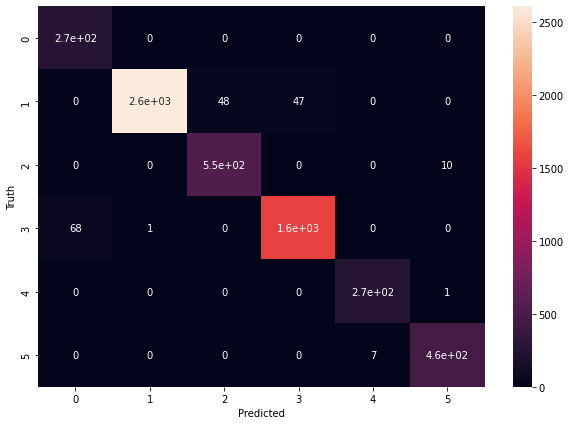

In [15]:
cm1=confusion_matrix(y_test,svm_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm1,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
accuracy=accuracy_score(y_test,svm_pred)
print("accuracy",accuracy*100)

accuracy 96.91890976807179


2. Naive Bayes Classsifier

In [19]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)
gnb.score(X_test,y_test)

0.8539021499915355

Text(69.0, 0.5, 'Truth')

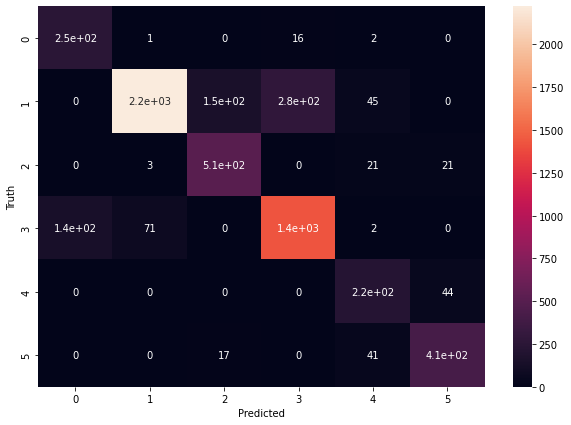

In [20]:
cm2=confusion_matrix(y_test,gnb_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm2,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
accuracy=accuracy_score(y_test,gnb_pred)
print("accuracy",accuracy*100)

accuracy 85.39021499915354


3. KNN Classifier

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.9497206703910615

Text(69.0, 0.5, 'Truth')

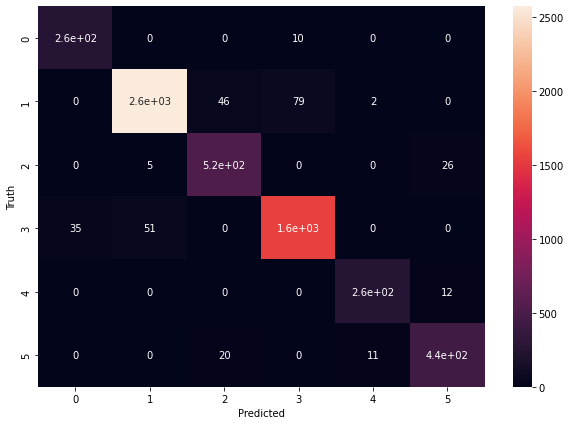

In [23]:
cm3=confusion_matrix(y_test,knn_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
accuracy=accuracy_score(y_test,knn_pred)
print("accuracy",accuracy*100)

accuracy 94.97206703910615


4. Random Forest Classifier

In [25]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
rf.score(X_test,y_test)

1.0

Text(69.0, 0.5, 'Truth')

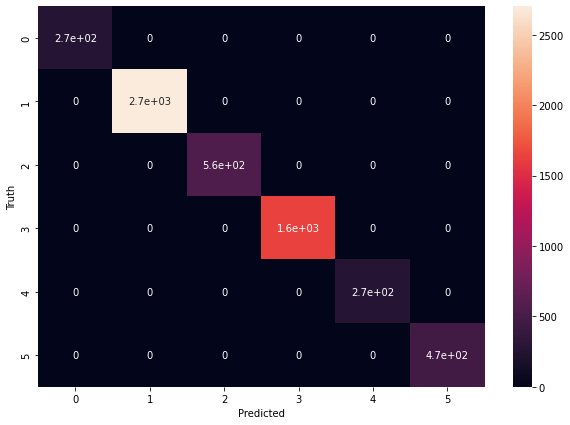

In [26]:
cm3=confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm3,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
accuracy=accuracy_score(y_test,rf_pred)
print("accuracy",accuracy*100)

accuracy 100.0


In [31]:
fin=pd.DataFrame(rf.predict([[25,24.38,74.09,16.53,11.99,0.52,12.72,30.14,70.0]]))
fin

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



,0
0,3
